## Panel Data analysis with selection into treatment

In [1]:
from synthlearners.simulator import generate_panel_data
from synthlearners.synth import Synth
from synthlearners.utils import prepare_panel

import matplotlib.pyplot as plt

In [2]:
# Generate data with selection on pre-treatment outcomes, no treatment effect
df = generate_panel_data(
    num_units=100,
    num_periods=50,
    num_treated=10,
    treatment_start=35,
    treatment_effect_type="none",
    selection_type="prob",
    selection_strength=0.5,
    seed=42,
    unit_variance=1.0,
    time_variance=0.1,
    noise_variance=0.2,
    ar_persistence=0.001,
)

df.head()

,unit,time,outcome,treatment
0,0,0,0.161158,0
1,0,1,0.518743,0
2,0,2,0.084377,0
3,0,3,0.346575,0
4,0,4,0.576881,0


In [3]:
# Prepare data for Synth
data = prepare_panel(
    df,
    unit_col="unit",
    time_col="time",
    outcome_col="outcome",
    treatment_col="treatment",
)

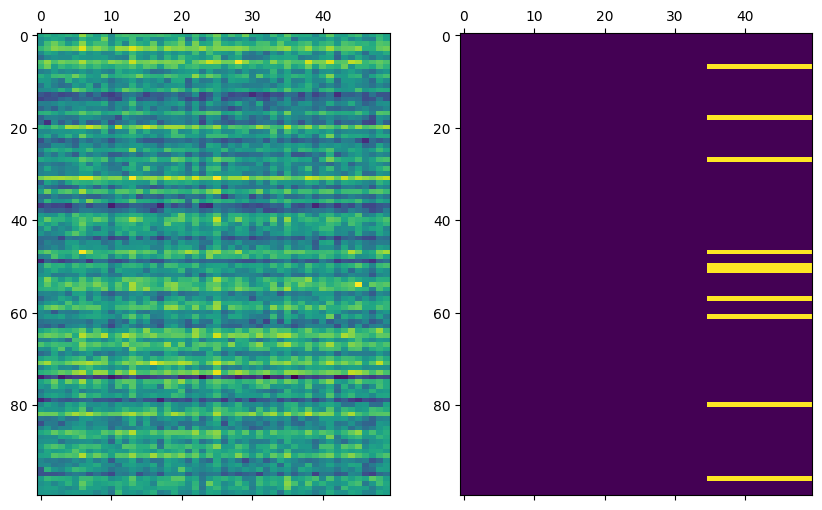

In [4]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].matshow(data["Y"], aspect="auto", cmap="viridis")
ax[1].matshow(data["W"], aspect="auto", cmap="viridis")

### vanilla synth

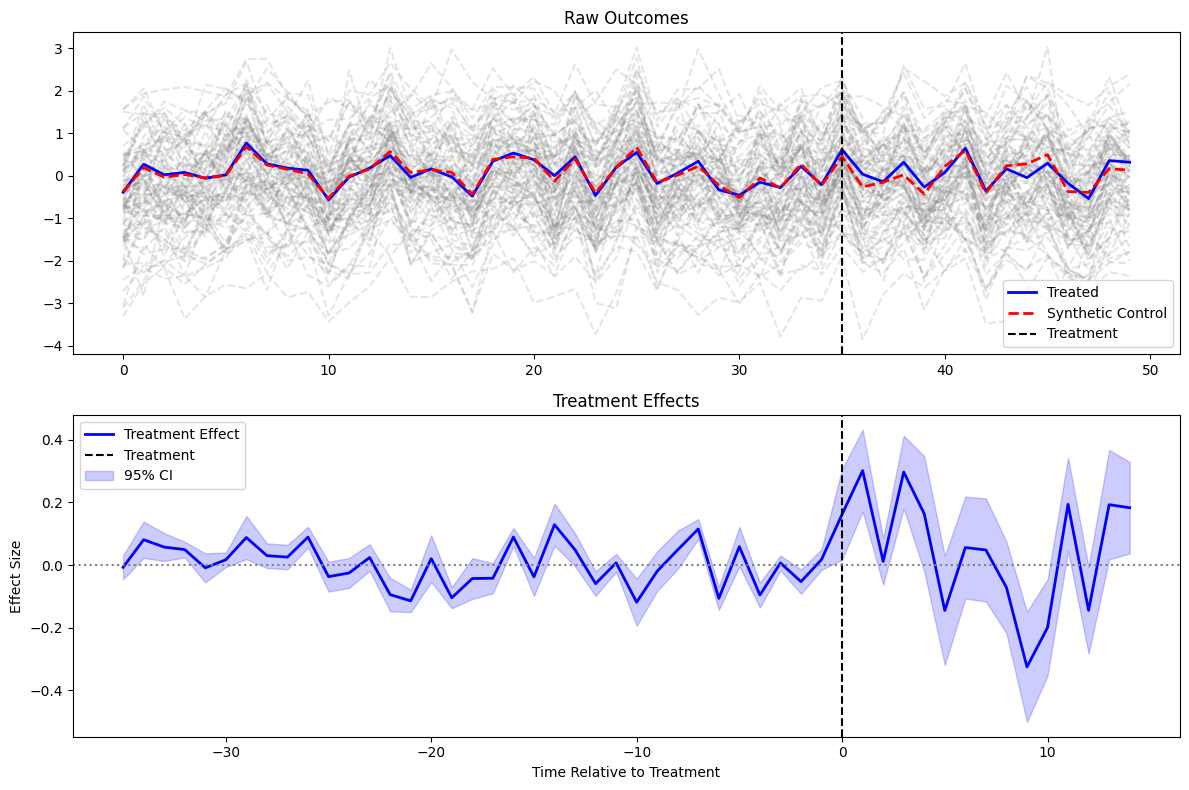

In [5]:
# Fit synthetic control
synth = Synth(method="simplex")
results = synth.fit(data["Y"], data["treated_units"], data["T_pre"])
# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Raw outcomes plot
synth.plot(results, data["Y"], data["treated_units"], data["T_pre"], mode="raw", ax=ax1)
ax1.set_title("Raw Outcomes")

# Treatment effect plot
synth.plot(
    results,
    data["Y"],
    data["treated_units"],
    data["T_pre"],
    mode="effect",
    ax=ax2,
    show_ci=True,
)
ax2.set_title("Treatment Effects")

plt.tight_layout()
plt.show()

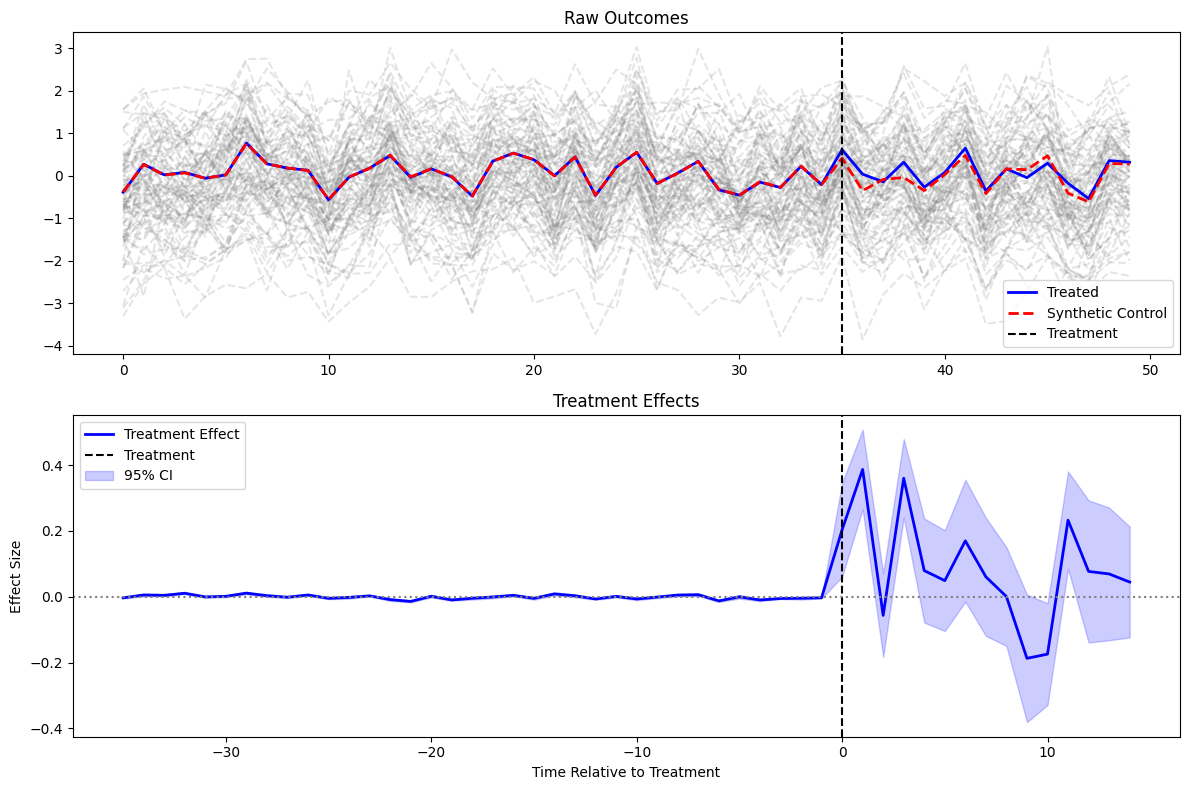

In [6]:
synth = Synth(method="lp_norm", p=2.0)
results = synth.fit(data["Y"], data["treated_units"], data["T_pre"])
# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Raw outcomes plot
synth.plot(results, data["Y"], data["treated_units"], data["T_pre"], mode="raw", ax=ax1)
ax1.set_title("Raw Outcomes")

# Treatment effect plot
synth.plot(
    results,
    data["Y"],
    data["treated_units"],
    data["T_pre"],
    mode="effect",
    ax=ax2,
    show_ci=True,
)
ax2.set_title("Treatment Effects")

plt.tight_layout()
plt.show()